# 图片读取处理

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np


img=cv2.imread('fig2.png')

In [2]:
img

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [3]:
cv2.imshow('image',img)  # 窗口名称   图像
cv2.waitKey(0)           # 按下任意按键退出
cv2.destroyAllWindows()  # 销毁窗口

In [4]:
def cv_show(name,img):   # 创造显示函数
    cv2.imshow(name,img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [5]:
cv_show('中文标题',img)

In [6]:
img.shape

(349, 602, 3)

In [7]:
img=cv2.imread('fig4.png',cv2.IMREAD_GRAYSCALE)  # 读取灰度图像
cv_show("gray",img)
img

array([[144, 144, 144, ..., 144, 144, 144],
       [144, 144, 144, ..., 144, 144, 144],
       [144, 144, 144, ..., 144, 144, 144],
       ...,
       [144, 144, 144, ..., 144, 144, 144],
       [144, 144, 144, ..., 144, 144, 144],
       [144, 144, 144, ..., 144, 144, 144]], dtype=uint8)

In [8]:
cv2.imwrite('gray.png',img) # 保存灰度图像
img.shape

(1440, 2560)

In [9]:
type(img) # 图片类型

numpy.ndarray

In [10]:
img.size  # 图片尺寸

3686400

In [11]:
img.dtype  #数据类型

dtype('uint8')

# 数据读取-视频
+ cv2.VideoCapture可以通过捕获摄像头，用数字来控制不同的设备，如0，1
+ 如果是视频文件，直接指定好路径即可

In [12]:
vc=cv2.VideoCapture('video.mp4') # 捕获视频

In [13]:
if vc.isOpened():             #  如果视频能够打开   
    open,frame=vc.read()     # 返回open=true/false    frame为每一帧画面
else:
    open=False               # 否则open=false

In [14]:
while open:                     # 视频可以打开
    ret,frame=vc.read()          # ret为frame返回的bool值
    if frame is None:
        break
    if ret==True:
        gray=cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
        cv2.imshow('result',gray)
        if cv2.waitKey(10) & 0xFF==27:        # 0xFF==27 对应按键esc，按下退出
            break;
vc.release()
cv2.destroyAllWindows()

## 截取部分图像数据

In [62]:
img=cv2.imread('fig2.png')
half=img[0:200,0:200]
cv_show('half',half)

In [63]:
b,g,r=cv2.split(img)

In [64]:
b

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [65]:
b.shape

(349, 602)

In [66]:
cv_show('b',b)

In [67]:
g

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [68]:
g.shape

(349, 602)

In [69]:
cv_show('g',g)

In [70]:
r

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [71]:
r.shape

(349, 602)

In [72]:
cv_show('r',r)

In [93]:
img=cv2.merge((b,g,r))   # 合并
cv_show('img',img)

In [95]:
# 只保留R
cur_img=img.copy()
cur_img[:,:,0]=0    ## [长：宽：通道]  [h:w:c]
cur_img[:,:,1]=0
cv_show('R',cur_img)

img=cv2.merge((b,g,r))   # 合并
cv_show('img',img)

# 边界填充

In [135]:
img=cv2.imread('fig3.jpg')  # cv2读取为B，G，R  plt显示为R，G，B
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # 将img的显示由bgr转为rgb

top_size,bottom_size,left_size,right_size=(50,50,50,50)

replicate=cv2.copyMakeBorder(img,top_size,bottom_size,left_size,right_size,borderType=cv2.BORDER_REPLICATE)
reflect=cv2.copyMakeBorder(img,top_size,bottom_size,left_size,right_size,cv2.BORDER_REFLECT)
reflect101=cv2.copyMakeBorder(img,top_size,bottom_size,left_size,right_size,cv2.BORDER_REFLECT_101)
wrap=cv2.copyMakeBorder(img,top_size,bottom_size,left_size,right_size,cv2.BORDER_WRAP)
constant=cv2.copyMakeBorder(img,top_size,bottom_size,left_size,right_size,cv2.BORDER_CONSTANT,value=0)

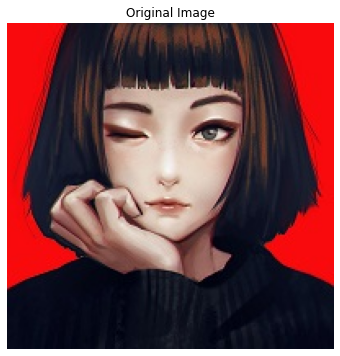

In [136]:
plt.figure(figsize=(6,6))
plt.imshow(img,cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.show()

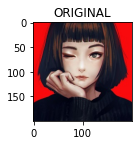

In [137]:
import matplotlib.pyplot as plt
plt.subplot(231),plt.imshow(img,'gray'),plt.title('ORIGINAL')
plt.show()

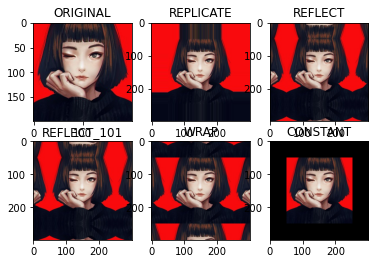

In [138]:
import matplotlib.pyplot as plt
plt.subplot(231),plt.imshow(img,'gray'),plt.title('ORIGINAL')
plt.subplot(232),plt.imshow(replicate,'gray'),plt.title('REPLICATE')
plt.subplot(233),plt.imshow(reflect,'gray'),plt.title('REFLECT')
plt.subplot(234),plt.imshow(reflect,'gray'),plt.title('REFLECT_101')
plt.subplot(235),plt.imshow(wrap,'gray'),plt.title('WRAP')
plt.subplot(236),plt.imshow(constant,'gray'),plt.title('CONSTANT')

plt.show()

+ BORDER_REPLICATE：复制法，复制最边缘像素
+ BORDER_REFLECT：反射法，对感兴趣的图像中的像素在两边进行复制例如：fedcba|abcdefgh|hgfedcb
+ BORDER_REFLECT_101：反射法，也就是以最边缘像素为轴，对称，gfedcb|abcdefgh|gfedcba
+ BORDER_WRAP：外包装法，cdefgh|abcdefgh|abcdefg
+ BORDER_CONSTANT：常量法，常数值填充

# 数值计算

In [139]:
img_fig1=cv2.imread('fig1.png')
img_fig3=cv2.imread('fig3.jpg')

In [140]:
img_fig1_2=img_fig1+20
img_fig1[:5,:,0]

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [141]:
img_fig1_2[:5,:,0]

array([[19, 19, 19, ..., 19, 19, 19],
       [19, 19, 19, ..., 19, 19, 19],
       [19, 19, 19, ..., 19, 19, 19],
       [19, 19, 19, ..., 19, 19, 19],
       [19, 19, 19, ..., 19, 19, 19]], dtype=uint8)

In [143]:
cv_show('fig1',img_fig1)
cv_show('fig2',img_fig1_2)

# 图像融合

In [165]:
img_fig1.shape

(401, 353, 3)

In [166]:
img_fig3.shape

(401, 353, 3)

In [167]:
img_fig3=cv2.resize(img_fig3,(353,401))
img_fig3.shape

(401, 353, 3)

In [168]:
res=cv2.addWeighted(img_fig1,0.5,img_fig3,0.5,0)
res = cv2.cvtColor(res, cv2.COLOR_BGR2RGB)

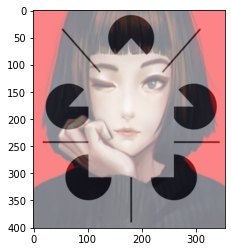

In [169]:
plt.imshow(res)

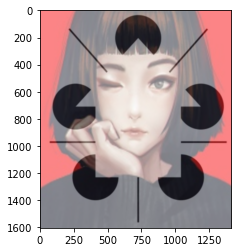

In [171]:
res=cv2.resize(res,(0,0),fx=2,fy=2)
plt.imshow(res)
plt.show()